# Hyper parameter Tuning (GridSearchCV)

**Topics:**
1. Train_test_split to find model performance
2. K fold cross validation
3. GridSearchCv for hyperparameter tuning
4. RandomizedSearchCv
5. Choosing best model
6. Exercise

# Theory

Lets Say you are trying to classify sklearn iris flowers dataset which is based on the sepals and petals width and length that you are trying to predict and what type of flowers it is.

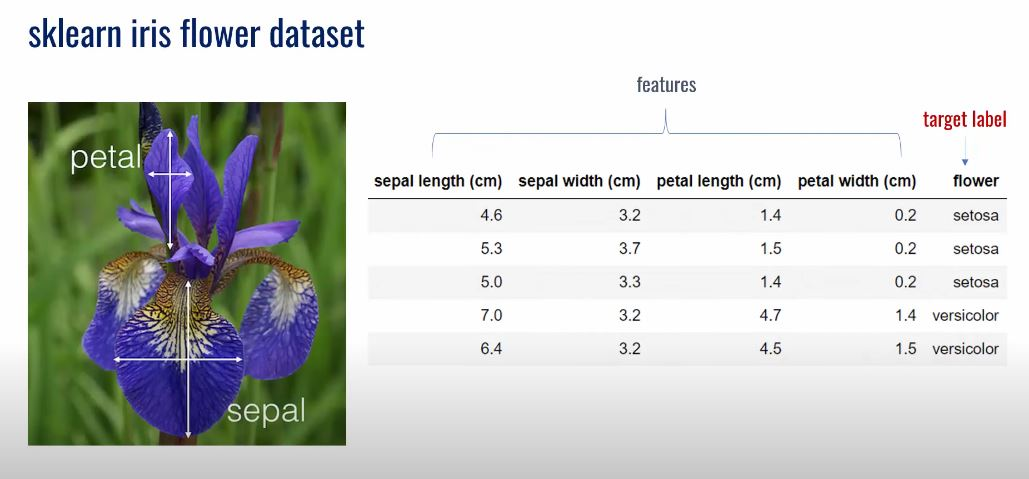

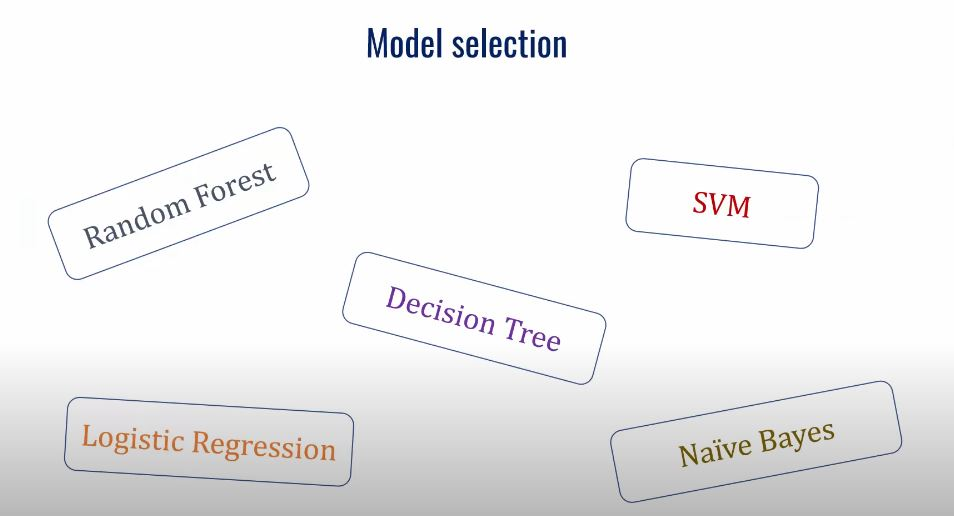

Now the first question that arises that which model should i use as there are so many to choose from and lets say you figured out that SVM is the model
that i want to use but the problem doesnt end there. Now we have  hyper parameters what kind of kernels, C and Gamma values should i be using there are so many values to choose from. The process of choosing the optimal parameter is called hyper tuning

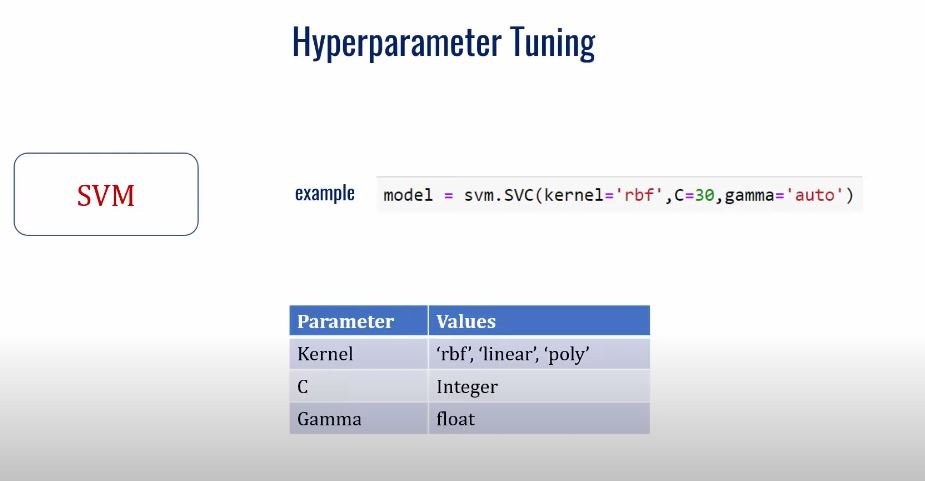

# Coding

In [1]:
from sklearn import svm, datasets
import numpy as np
iris = datasets.load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [4]:
model = svm.SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9333333333333333

In [5]:
# the upper method is not accurate as we if execute it again and again the score will change because the samples are not permanent so for that reason
# we will use k-fold cross-validation

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
cross_val_score(svm.SVC(kernel='linear', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [8]:
cross_val_score(svm.SVC(kernel='rbf', C=10, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [9]:
cross_val_score(svm.SVC(kernel='rbf', C=20, gamma='auto'), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [10]:
# other way to represent this method is by using for loop

In [11]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_score = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,  C=cval, gamma='auto'), iris.data, iris.target, cv=5)
        avg_score[kval + '_' + str(cval)] = np.average(cv_scores)

avg_score

{'rbf_1': np.float64(0.9800000000000001),
 'rbf_10': np.float64(0.9800000000000001),
 'rbf_20': np.float64(0.9666666666666668),
 'linear_1': np.float64(0.9800000000000001),
 'linear_10': np.float64(0.9733333333333334),
 'linear_20': np.float64(0.9666666666666666)}

In [12]:
# the upper method is not convinient because it gets long if there were 4 parameters or more to apply so it will become more fussy
# Sklearns provide GridSearchCV for this purpose

In [13]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)

clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.0037962 , 0.00099754, 0.0009995 , 0.00119953, 0.00119901,
        0.0023983 ]),
 'std_fit_time': array([3.18485401e-03, 4.05451806e-06, 4.10190833e-07, 3.99923339e-04,
        3.99709157e-04, 2.33098111e-03]),
 'mean_score_time': array([0.00199966, 0.00079956, 0.00079966, 0.00079937, 0.00099993,
        0.00559707]),
 'std_score_time': array([0.00154797, 0.00039978, 0.00039983, 0.00074819, 0.00063256,
        0.00870367]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'li

In [14]:
df = pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003796,3.184854e-03,0.002000,0.001548,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000998,4.054518e-06,0.000800,0.000400,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000999,4.101908e-07,0.000800,0.000400,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001200,3.999233e-04,0.000799,0.000748,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.001199,3.997092e-04,0.001000,0.000633,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [15]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [16]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [17]:
clf.best_score_

np.float64(0.9800000000000001)

In [21]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [22]:
# The cost of memory in Grid search CV is very high and it is one of the deficiency of this method. To tackle this computation problem 
# the sklearn library comes up with another class called RandomizedSearchCV.

# RandomizedSearchCV  will not try every single permutation and combination of parameters but it will try random combination of these parameters values
# and we can choose what those iteration could be.

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C':[1,10,20],
    'kernel': ['rbf','linear']
},cv=5, return_train_score=False, n_iter=2)

rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.98
1,10,rbf,0.98


In [29]:
dir(rs)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [30]:
rs.best_score_

np.float64(0.9800000000000001)

In [31]:
rs.best_params_

{'kernel': 'rbf', 'C': 1}

In [33]:
# how to choose a best model for a given model

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
# We have to define our parameter grid so for this we are defining them as a simple Json object or python dictionary

In [42]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [43]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [39]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}
